#  ML Assignment Group: 119 
## Problem Statement
### Predict whether the credit card using the customer is going to default or not.

<ul>
    <li>Import the data from the  <a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients">default of credit card clients</a> (2 points)</li>
<li>Consider all columns as independent variables and assign to variable X except the last column and consider the last column as dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point)</li>
<li>Compute some basic statistical details like percentile, mean, standard deviation of dataset (1 point)</li>
<li>Do Feature Scaling on Independent variables (2 points)</li>
<li>Split the data into train and test dataset (1 point)</li>
<li>Use sklearn library to train on train dataset on random forest and predict on test dataset  (3 points)</li>
<li>Compute the accuracy and confusion matrix. (2 points)</li>
</ul>

### Contributors

J Manoj Balaji (2019AB04228@wilp.bits-pilani.ac.in)

Siddharth Verma (2019AD04097@wilp.bits-pilani.ac.in)

Randeep Singh (2019AD04069@wilp.bits-pilani.ac.in)

## Import necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

## Import the dataset

In [2]:
df = pd.read_excel('default of credit card clients.xls',skiprows=1,usecols="B:Y")

print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

## Understanding data

In [3]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [37]:
# understand age to decide whether to consider it as Continuous or Categorical, since the values are within a very short range, we can take it as categorical variable
data_set.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

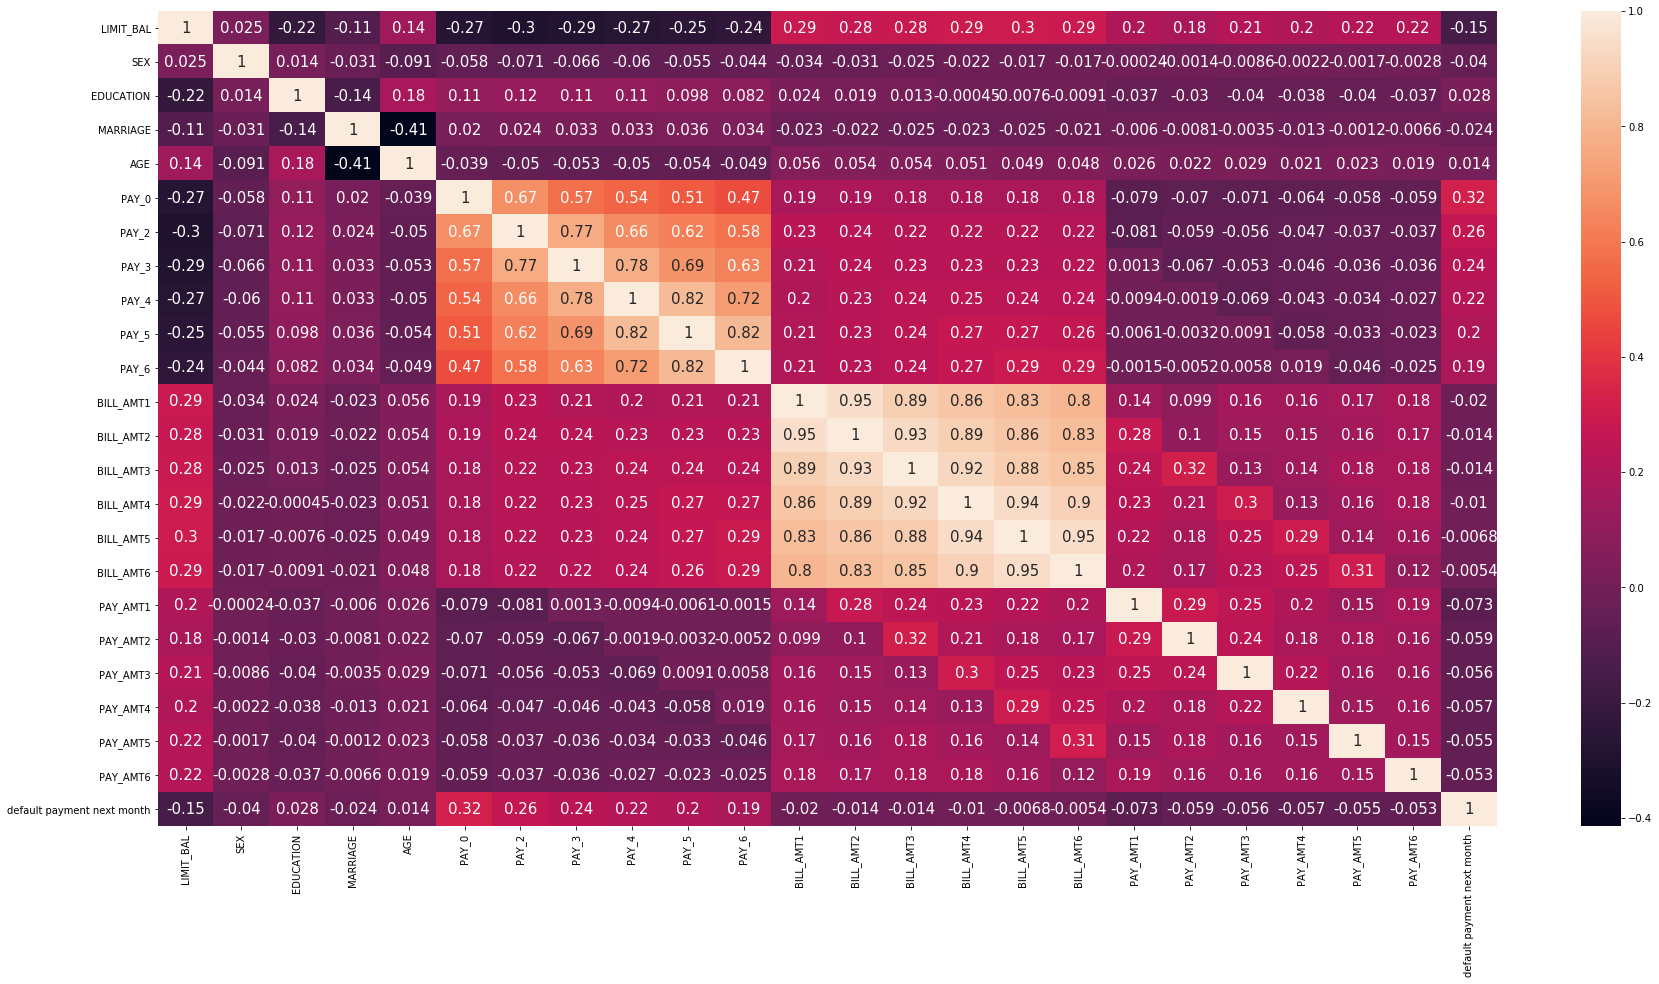

In [43]:
fig, ax = plt.subplots(figsize=(30,15)) 
sns.heatmap(df.corr(), annot=True, ax=ax, annot_kws={"size": 15})

From the dataset, we can see that SEX, EDUCATION, MARIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 are cetgorical variables and BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, LIMIT_BAL are continuous variables. And as specified in the problem statement, the last column i.e. default payment next month is the target column. We need to scaled values of continuous variables.

## Data Preprocessing - Scaling

In [6]:
scaler = StandardScaler()

In [7]:
continous_list = ['BILL_AMT1','BILL_AMT2' ,'BILL_AMT3','BILL_AMT4','BILL_AMT5' ,'BILL_AMT6' ,'PAY_AMT1' ,'PAY_AMT2' ,'PAY_AMT3' ,'PAY_AMT4' ,'PAY_AMT5' ,'PAY_AMT6','LIMIT_BAL']

In [8]:
continous_transform_df = pd.DataFrame(scaler.fit_transform(df[continous_list]),columns=continous_list)

In [9]:
continous_transform_df.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL
0,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-1.136720
1,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.365981
2,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.597202
3,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.905498
4,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.905498


In [10]:
categorical_list  = np.setdiff1d(df.columns,continous_list)

In [11]:
categorical_df = df[categorical_list]

In [12]:
categorical_df.head()

,AGE,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,default payment next month
0,24,2,1,2,2,-1,-1,-2,-2,2,1
1,26,2,2,-1,2,0,0,0,2,2,1
2,34,2,2,0,0,0,0,0,0,2,0
3,37,2,1,0,0,0,0,0,0,2,0
4,57,2,1,-1,0,-1,0,0,0,1,0


In [13]:
# re-join scaled-continuous and categorical dataset
data_set = categorical_df.merge(continous_transform_df,left_index=True,right_index=True)

In [14]:
data_set.head()

,AGE,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL
0,24,2,1,2,2,-1,-1,-2,-2,2,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-1.136720
1,26,2,2,-1,2,0,0,0,2,2,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.365981
2,34,2,2,0,0,0,0,0,0,2,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.597202
3,37,2,1,0,0,0,0,0,0,2,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.905498
4,57,2,1,-1,0,-1,0,0,0,1,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.905498


## Split dataset to train and test

In [15]:
X=data_set.drop('default payment next month',axis=1)
y=data_set['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

## Fit a Random Forest Model on the train data

In [17]:
rf = RandomForestClassifier(random_state=42)

In [18]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Evaluate the model on test dataset and find the accuracy and confusion matrix

In [19]:
y_predict=rf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

In [21]:
accuracy = accuracy_score(y_pred = y_predict,y_true = y_test)

In [39]:
print("Accuracy: {}%".format(round(100*accuracy, 2)))

Accuracy: 81.47%


In [23]:
conf_mat = confusion_matrix(y_pred = y_predict,y_true = y_test)

In [40]:
conf_mat

array([[4415,  272],
       [ 840,  473]])

In [41]:
# Verification of confusion matrix
Counter(y_test)

Counter({0: 4687, 1: 1313})

## Visualize the Confusion matrix as a heatmap

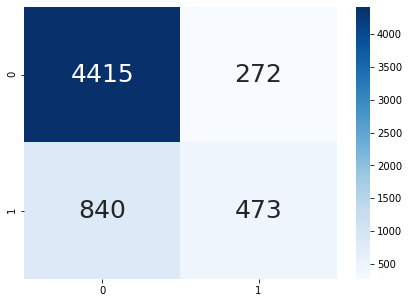

In [41]:
fig, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches
sns.heatmap(conf_mat, annot=True, ax=ax, cmap='Blues', annot_kws={"size": 25},fmt="d")